# Task 1

### 1 Read the image

In [15]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('House.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


## Task 1 (a)

### 2 Extract SIFT features with default parameters

In [16]:
sift = cv2.SIFT_create()

keypoints, descriptors = sift.detectAndCompute(gray_image, None)


### 3 Visualize keypoints on the image

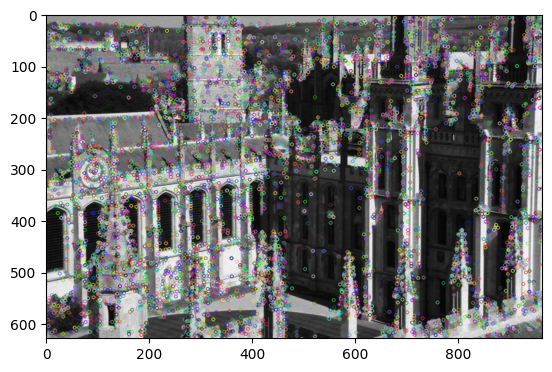

In [17]:
image_with_keypoints = cv2.drawKeypoints(gray_image, keypoints, image)
image_with_keypoints_rgb = cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB)

plt.imshow(image_with_keypoints_rgb)
plt.show()


## Task 1 （b）

### 4 Reduce the number of keypoints (10% of default keypoints)

In [18]:
reduced_keypoints = int(0.1 * len(keypoints))
sift_reduced = cv2.SIFT_create(nfeatures=reduced_keypoints)
keypoints_reduced, descriptors_reduced = sift_reduced.detectAndCompute(gray_image, None)


### 5 Visualize reduced keypoints on the image

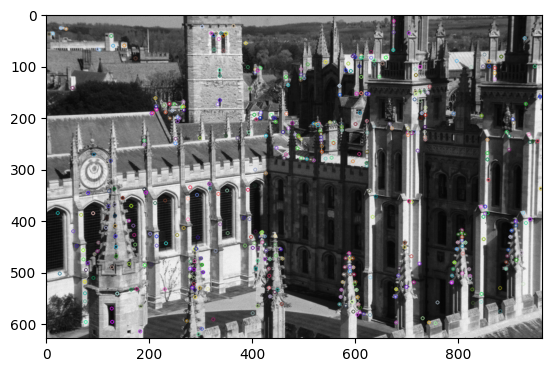

In [19]:
image_with_reduced_keypoints = cv2.drawKeypoints(gray_image, keypoints_reduced, image)

plt.imshow(image_with_reduced_keypoints)
plt.show()

### In step 4, we reduced the number of keypoints to 10% of the default keypoints by setting the nfeatures parameter in SIFT_create(). This helps in better visualization of keypoints on the image.

# Task 2

## Task 2 (a)

### 1 Add pepper noise to the image

In [20]:
import numpy as np
from skimage.util import random_noise

noisy_image = random_noise(gray_image, mode='pepper')
noisy_image = np.array(255 * noisy_image, dtype=np.uint8)


## Task 2 (b)

### Extract SIFT features with reduced keypoints (10% of default keypoints)

In [21]:
reduced_keypoints = int(0.1 * len(keypoints))
sift_reduced = cv2.SIFT_create(nfeatures=reduced_keypoints)
keypoints_noisy, descriptors_noisy = sift_reduced.detectAndCompute(noisy_image, None)


### Visualize keypoints on the noisy image

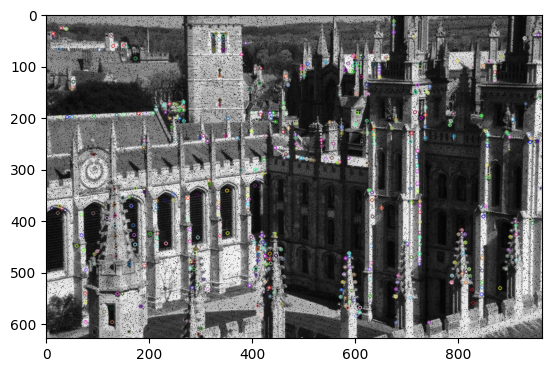

In [22]:
image_with_noisy_keypoints = cv2.drawKeypoints(noisy_image, keypoints_noisy, image)

plt.imshow(image_with_noisy_keypoints)
plt.show()


## Task 2 (c)

### As for part c), inspect the keypoints visually by comparing the images with keypoints from the original image and the noisy image.

### SIFT is designed to be robust to noise, so the keypoints on the noisy image should be roughly the same as those on the original image. This means that SIFT is capable of identifying and matching key features in images, even when they are subjected to noise or other distortions.

# Task 3

In [23]:
import cv2
from matplotlib import pyplot as plt

scene1 = cv2.imread('Scene1.png')
scene2 = cv2.imread('Scene2.png')
gray1 = cv2.cvtColor(scene1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(scene2, cv2.COLOR_BGR2GRAY)


## Extract SIFT features and show keypoints:

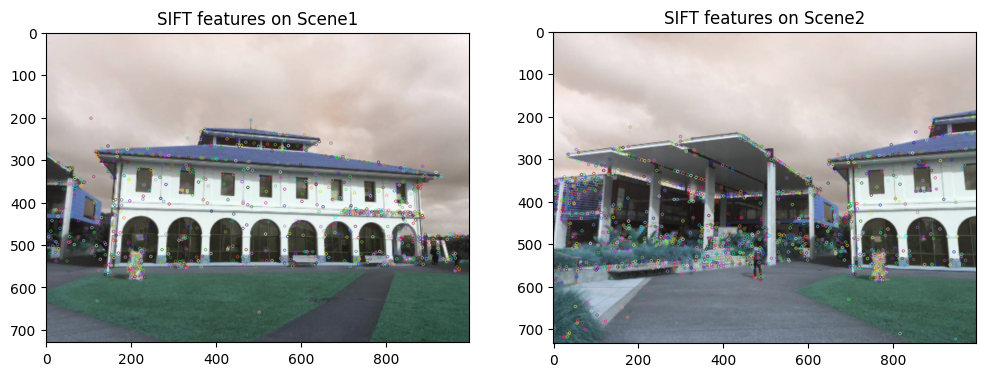

In [24]:
sift = cv2.SIFT_create()

keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

image_with_keypoints1 = cv2.drawKeypoints(scene1, keypoints1, scene1)
image_with_keypoints2 = cv2.drawKeypoints(scene2, keypoints2, scene2)

fig, axs = plt.subplots(ncols=2, figsize=(12, 8))

axs[0].imshow(cv2.cvtColor(image_with_keypoints1, cv2.COLOR_BGR2RGB))
axs[0].set_title('SIFT features on Scene1')
axs[1].imshow(cv2.cvtColor(image_with_keypoints2, cv2.COLOR_BGR2RGB))
axs[1].set_title('SIFT features on Scene2')
plt.show()

## Match features and find the homography matrix

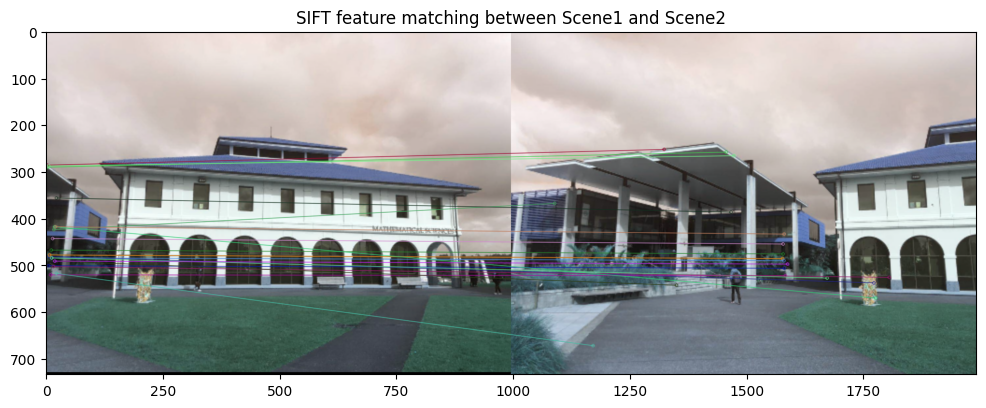

In [25]:
scene1 = cv2.imread('Scene1.png')
scene2 = cv2.imread('Scene2.png')
gray1 = cv2.cvtColor(scene1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(scene2, cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()

keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

# Create BFMatcher object
matcher = cv2.BFMatcher()
matches = matcher.match(descriptors1, descriptors2)

# Draw first 20 matches.
img_matches = cv2.drawMatches(scene1, keypoints1, scene2, keypoints2, matches[:20], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Show matches.
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.title('SIFT feature matching between Scene1 and Scene2')
plt.show()

## Stitch the images using the homography matrix

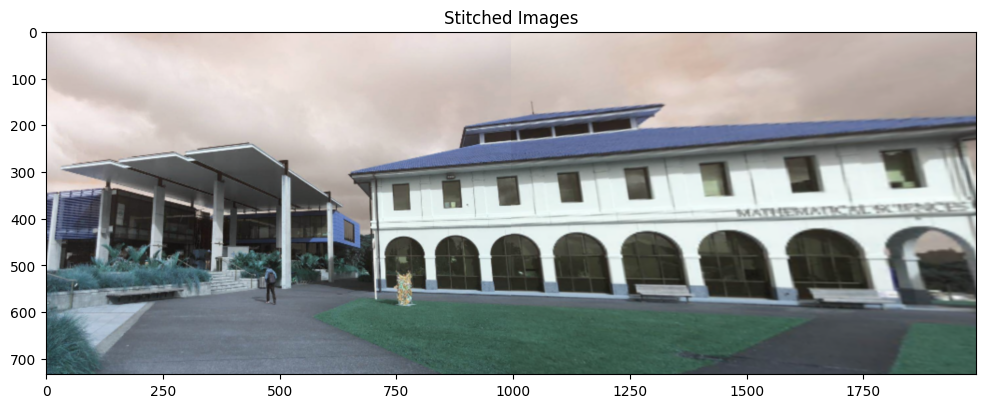

In [26]:
# Find the homography matrix
src_pts = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

h1, w1 = gray1.shape
h2, w2 = gray2.shape

# Calculate the size of the stitched image
size = (w1 + w2, max(h1, h2))

stitched_image = cv2.warpPerspective(scene1, H, size)
stitched_image[0:h2, 0:w2] = scene2

plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(stitched_image, cv2.COLOR_BGR2RGB))
plt.title('Stitched Images')
plt.show()

## A more specific version

## （a）Extract the SIFT features and show the keypoints on each image.

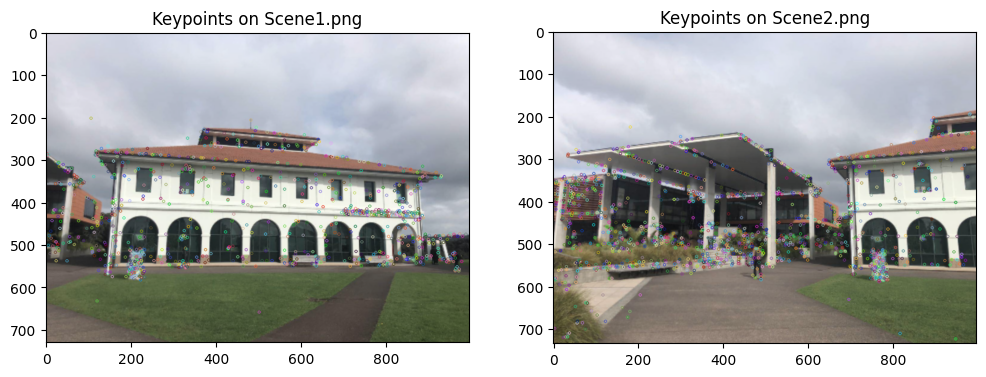

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the two input images
image_left = cv2.imread('Scene1.png')
image_right = cv2.imread('Scene2.png')

# Convert the input images to grayscale
gray_left = cv2.cvtColor(image_left, cv2.COLOR_BGR2GRAY)
gray_right = cv2.cvtColor(image_right, cv2.COLOR_BGR2GRAY)

# Create SIFT detector object
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints_left, descriptors_left = sift.detectAndCompute(gray_left, None)
keypoints_right, descriptors_right = sift.detectAndCompute(gray_right, None)

# Draw keypoints on left image
img_left_keypoints = cv2.drawKeypoints(image_left, keypoints_left, None)

# Draw keypoints on right image
img_right_keypoints = cv2.drawKeypoints(image_right, keypoints_right, None)

# Show the images with detected keypoints
fig, axs = plt.subplots(ncols=2, figsize=(12, 8))
axs[0].imshow(img_left_keypoints)
axs[0].set_title('Keypoints on Scene1.png')
axs[1].imshow(img_right_keypoints)
axs[1].set_title('Keypoints on Scene2.png')
plt.show()

## (b) Find the keypoint correspondences between the images and draw them.

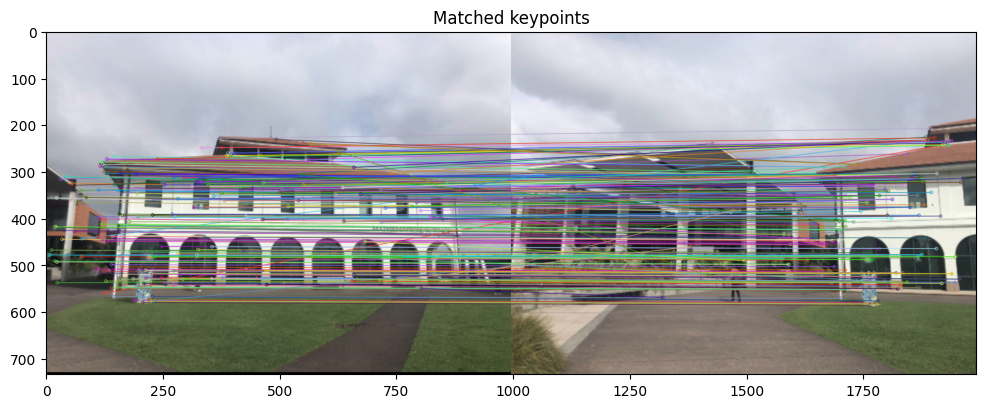

In [28]:
# Create BFMatcher object
bf = cv2.BFMatcher()

# Match descriptors
matches = bf.knnMatch(descriptors_left, descriptors_right, k=2)

# Apply ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw matched keypoints
img_matches = cv2.drawMatches(image_left, keypoints_left, image_right, keypoints_right, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(12, 8))
plt.imshow(img_matches)
plt.title('Matched keypoints')
plt.show()

## (c) Use the RANSAC algorithm to robustly estimate the mapping of one the two images to the other based on the selected best keypoint correspondences and then apply the mapping and show the final stitched image. 

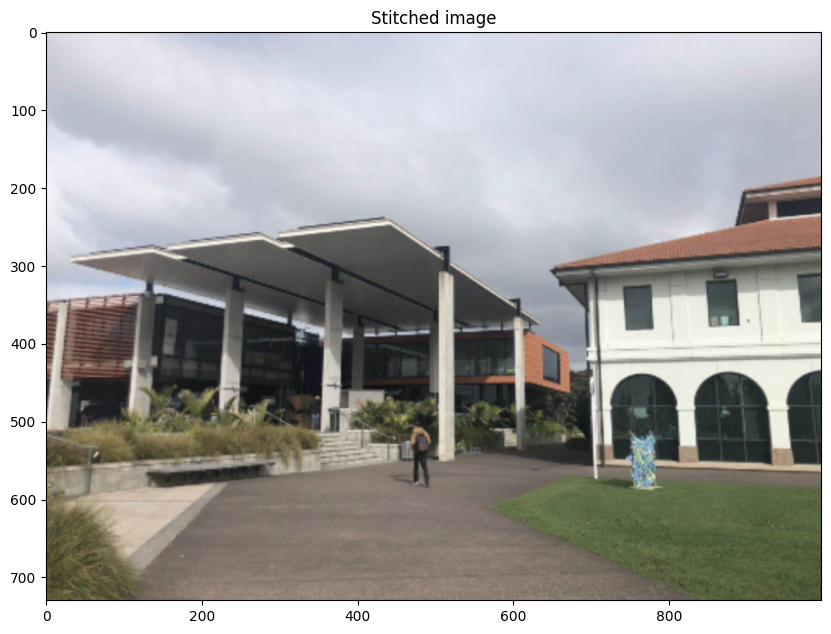

In [29]:
# Use RANSAC to find the homography matrix
src_pts = np.float32([keypoints_left[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints_right[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Warp the left image to align with the right image based on the homography matrix
h, w = image_left.shape[:2]
aligned_image = cv2.warpPerspective(image_left, M, (w, h))

# Crop right image to match the size of aligned image
image_right = image_right[0:h, 0:w]


# Combine the warped left image and right image into one final image
merged_image = aligned_image.copy()
merged_image[0:image_right.shape[0], 0:image_right.shape[1]] = image_right

# Crop the final image to remove black pixels
gray = cv2.cvtColor(merged_image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)[1]
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

x, y, w, h = cv2.boundingRect(contours[0])
final_image = merged_image[y:y + h, x:x + w]

plt.figure(figsize=(10, 10))
plt.imshow(final_image)
plt.title('Stitched image')
plt.show()
